# Data analysis on the data

In [24]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/rudio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rudio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Data pre-processing

In [25]:
df = pd.read_csv("../data/raw/tripadvisor_hotel_reviews.csv")
df = df.dropna(subset=["Review"])
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [26]:
def pre_process(x):
    if x>3:
        return 'positive'
    elif x<3:
        return 'negative'
    else :
        return 'neutral'
    

df['Label'] = df['Rating'].apply(pre_process)

df.head()

,Review,Rating,Label
0,nice hotel expensive parking got good deal sta...,4,positive
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,neutral
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive


##  2. Data balance analysis

In this section I want to analyze the balance of data as this could have an influence on the performance of the model.
It appears that there is a great unbalance in the dataset with a big majority of positive reviews. That means that it will be necessary to divide the data wisely to limit the unbalance of data fed to the model for the training.

<Figure size 720x576 with 0 Axes>

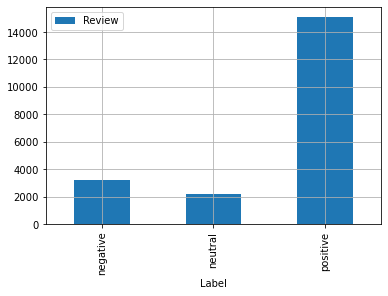

In [27]:
gr = df.groupby(by='Label').count()
gr = gr.drop("Rating",axis=1)

plt.figure(figsize=(10,8))
gr.plot.bar()
plt.grid()


## 3. NLP preprocessing

In [28]:
def preprocess_text(sentence, snow, stop):
    """remove html tags, punctuation, stopwords and stemming on a sentence"""
    sentence = sentence.lower()  # lowercase
    cleanr = re.compile("<.*?>")
    sentence = re.sub(cleanr, " ", sentence)  # remove html tags
    sentence = re.sub(r'[?|!|\'|"|#]', r"", sentence)
    sentence = re.sub(r"[.|,|)|(|\|/]", r" ", sentence)  # remove punctuation
    sentence = nltk.word_tokenize(sentence)
    words = [snow.stem(word) for word in sentence if word not in stop]  # remove stopwords and stemming

    return words

In [29]:
stop = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer("english")

df["Tokens"] = df["Review"].apply(preprocess_text,args=(snow,stop))

In [32]:
df.head()

L = []
for i in range(0,df.shape[0]):
    L +=df['Tokens'][i]

d = []

for count,token in enumerate(L):
    d.append([token,count])


df_tokens = pd.DataFrame(d,columns=["token","count"])
df_tokens.head()

,token,count
0,nice,0
1,hotel,1
2,expens,2
3,park,3
4,got,4


In [35]:
# df_tokens.sort_values(by='count',ascending=False)

,token,count
2081515,place,2081515
2081514,feel,2081514
2081513,look,2081513
2081512,care,2081512
2081511,nt,2081511
...,...,...
4,got,4
3,park,3
2,expens,2
1,hotel,1


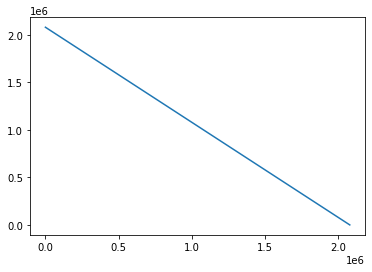

In [40]:
df_tokens = df_tokens.sort_values(by='count',ascending=False)
df_tokens = df_tokens.reset_index()
df_tokens = df_tokens.drop('index',axis=1)

rank = np.array(df_tokens.index+1)
freq = np.array(df_tokens['count'])
